<a href="https://colab.research.google.com/github/lagmagalhaes/EDA_Ifood-parte1/blob/main/Suicidio_Portugal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise Exploratória de dados com Python

O suicídio é um problema de saúde pública complexo e multifacetado que afeta significativamente a sociedade portuguesa. Esta análise exploratória visa examinar em profundidade os dados disponíveis sobre o suicídio em Portugal, buscando identificar tendências, padrões e fatores associados. Ao lançar luz sobre este tema delicado, esperamos contribuir para uma melhor compreensão do fenômeno e, consequentemente, para o desenvolvimento de estratégias mais eficazes de prevenção e intervenção.

Análise exploratória sobre suicídio realizada a partir da base de dados Suicide Rates Overview 1985 to 2021, disponibilizada na plataforma Kaggle.

Discrição dos dados:

country: País

year: Ano

sex: Sexo

age: Idade

suicides_no: Número de suicídios

population: População

suicides/100k pop: Taxa de suicídios por 100.000 habitantes

country-year: Combinação de país e ano (possivelmente para análise longitudinal)

HDI for year: Índice de Desenvolvimento Humano para o ano em questão

gdp for year (): Produto Interno Bruto per capita do país no ano em questão (em dólares)

generation: Geração (possivelmente uma classificação demográfica)  

Estes dados estão relacionados com um estudo sobre taxas de suicídio ao longo dos anos em diferentes países.

In [1]:
# Importar Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

In [2]:
#Importar dados para um DataFrame
df = pd.read_csv("/content/drive/MyDrive/master.csv")


In [3]:
# Mostrar o Arquivo
print("Formato do DataFrame: ", df.shape)
df.head()

Formato do DataFrame:  (31756, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796.0,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796.0,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796.0,Boomers


In [4]:
# Verificar os tipos de colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31756 entries, 0 to 31755
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             31756 non-null  object 
 1   year                31756 non-null  int64  
 2   sex                 31756 non-null  object 
 3   age                 31756 non-null  object 
 4   suicides_no         30556 non-null  float64
 5   population          31756 non-null  int64  
 6   suicides/100k pop   31756 non-null  float64
 7   country-year        31756 non-null  object 
 8   HDI for year        12300 non-null  float64
 9    gdp_for_year ($)   31756 non-null  object 
 10  gdp_per_capita ($)  31756 non-null  float64
 11  generation          31756 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 2.9+ MB


In [5]:
# Verificar a existência de dados duplicados
duplicados = df.duplicated().sum()
print(duplicados)

0


Não existem duplicados!!!

In [6]:
# Verificar se existem dados nulos
nulos = df.isnull().sum()
print(nulos)

country                   0
year                      0
sex                       0
age                       0
suicides_no            1200
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64


In [7]:
# Apagar os dados nulos
data = df.dropna()

In [8]:
# Qual é a média, mediana, 25 percentil, 75 percentil, mínimo e máximo Mundial.
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,31756.000000,30556.000000,3.175600e+04,31756.000000,12300.000000,31756.000000
mean,2003.395390,237.136242,7.217454e+06,11.716668,0.793666,17588.954606
std,9.760604,867.956107,5.799323e+07,21.590926,0.097480,19464.861140
min,1985.000000,0.000000,2.780000e+02,0.000000,0.377790,251.000000
25%,1996.000000,3.000000,1.288210e+05,0.370000,0.727000,3765.000000
50%,2004.000000,25.000000,5.468325e+05,4.285000,0.800457,10062.000000
75%,2011.000000,132.000000,2.908763e+06,14.560000,0.874000,25622.000000
max,2020.000000,22338.000000,1.411100e+09,515.092734,0.975114,126352.000000


A média de suicídios por 100 mil habitantes é de aproximadamente 12.

A tabela apresenta estatísticas descritivas para cada uma das variáveis:

count: Número de observações (anos) para cada variável.   
mean: Média aritmética: valor central típico de cada variável.  
std: Desvio padrão: medida da dispersão dos dados em torno da média.  
min: Valor mínimo: menor valor observado para cada variável.  
25%: Primeiro quartil: valor abaixo do qual se encontram 25% dos dados.  
50%: Segundo quartil (mediana): valor que divide os dados em duas partes iguais.  
75%: Terceiro quartil: valor abaixo do qual se encontram 75% dos dados.  
max: Valor máximo: maior valor observado para cada variável.

In [9]:
# Calculo do coeficiente de variação
df["suicides/100k pop"].std()/df["suicides/100k pop"].mean()

1.8427531522558325

  Com o coeficiente de variação de 1.842 indica que os dados sobre suicídios por 100 mil habitantes são altamente variáveis em relação à média, refletindo uma ampla dispersão dos valores.

In [10]:
# Calculo de Assimetria
df["suicides/100k pop"].skew()

7.358361333272774

Assimetria com o valor de 7.358361333272774 indica uma distribuição altamente assimétrica para a direita, com a maioria dos dados de suicídios por 100 mil habitantes concentrados em valores mais baixos, mas com alguns valores extremamente altos que puxam a cauda da distribuição para a direita.

In [11]:
#Registos únicos baseados nas colunas.
print("Registos únicos baseados nas colunas :\n",df.nunique(axis=0))

Registos únicos baseados nas colunas :
 country                 114
year                     36
sex                       2
age                       6
suicides_no            2097
population            25891
suicides/100k pop      7466
country-year           2649
HDI for year            921
 gdp_for_year ($)      2631
gdp_per_capita ($)     2561
generation                6
dtype: int64


In [17]:
#verificar isoladamente os DataFrames de Portugal e o Mundial para futuras comparações
#verificar isoladamente os DataFrames de Portugal e o Mundial para futuras comparações
print("--> Mundial:")
display(df.isnull().sum())

print("\n", "--." * 10, "\n")

print("--> Portugal:")
df_portugal = df[df['country'] == 'Portugal']
display(df_portugal.isnull().sum())

--> Mundial:


,0
country,0
year,0
sex,0
age,0
suicides_no,1200
population,0
suicides/100k pop,0
country-year,0
HDI for year,19456
gdp_for_year ($),0



 --.--.--.--.--.--.--.--.--.--. 

--> Portugal:


,0
country,0
year,0
sex,0
age,0
suicides_no,24
population,0
suicides/100k pop,0
country-year,0
HDI for year,216
gdp_for_year ($),0


In [18]:
unique_years = df['year'].unique()
print("\nLista dos anos na coluna 'year' :")
print(unique_years)


Lista dos anos na coluna 'year' :
[1987 1988 1989 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 1985 1986 1990 1991 2012 2013
 2014 2015 2011 2016 2020 2019 2018 2017]


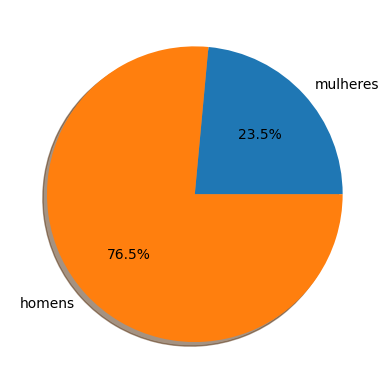

In [19]:
#valores entre homens e mulheres
homens_mulheres = df.groupby('sex').suicides_no.sum() / df.groupby('sex').suicides_no.sum().sum()

#gráfico de pizza
plt.pie(homens_mulheres, labels=['mulheres', 'homens'], autopct='%1.1f%%', shadow=True);

A análise mostra que a proporção de suicídios entre homens (76,5% dos suicídio) é significativamente maior do que entre mulheres (23,5% dos suicídios), com os homens a representar cerca de três vezes mais suicídios do que as mulheres.

In [28]:
fig = go.Figure(
    data=[go.Bar(y=rate_for_year_country['suicides/100k pop'], x=rate_for_year_country['country'])],
    layout_title_text="Países com maior número de suicídios por 100 mil habitantes"
)

fig.show()


Os País com mais suicídios por 100 mil habitantes

In [29]:
unique_countries = df['country'].unique()
print("\nLista de países únicos na coluna 'country':")
print(unique_countries)


Lista de países únicos na coluna 'country':
['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelle

In [30]:
df_portugal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 372 entries, 19356 to 31732
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             372 non-null    object 
 1   year                372 non-null    int64  
 2   sex                 372 non-null    object 
 3   age                 372 non-null    object 
 4   suicides_no         348 non-null    float64
 5   population          372 non-null    int64  
 6   suicides/100k pop   372 non-null    float64
 7   country-year        372 non-null    object 
 8   HDI for year        156 non-null    float64
 9    gdp_for_year ($)   372 non-null    object 
 10  gdp_per_capita ($)  372 non-null    float64
 11  generation          372 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 37.8+ KB


In [31]:
#extrair os dados relacionados a Portugal
df_portugal = df[df.country == "Portugal"].copy()
print("Formato do DataFrame: ", df_portugal.shape)
df_portugal

Formato do DataFrame:  (372, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
19356,Portugal,1985,male,75+ years,89.0,160554,55.430000,Portugal1985,0.676000,"27,11,84,76,174",2912.00000,G.I. Generation
19357,Portugal,1985,male,55-74 years,245.0,805542,30.410000,Portugal1985,0.676000,"27,11,84,76,174",2912.00000,G.I. Generation
19358,Portugal,1985,male,35-54 years,185.0,1103803,16.760000,Portugal1985,0.676000,"27,11,84,76,174",2912.00000,Silent
19359,Portugal,1985,female,75+ years,39.0,288221,13.530000,Portugal1985,0.676000,"27,11,84,76,174",2912.00000,G.I. Generation
19360,Portugal,1985,male,25-34 years,87.0,703271,12.370000,Portugal1985,0.676000,"27,11,84,76,174",2912.00000,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
31404,Portugal,2017,female,55-74 years,100.0,10300300,0.970846,Portugal2017,0.852171,2.21E+11,21437.34750,G.I. Generation
31486,Portugal,2020,female,75+ years,NaN,10297081,0.000000,Portugal2020,0.859173,2.29E+11,22176.29671,G.I. Generation
31568,Portugal,2019,female,75+ years,NaN,10286263,0.000000,Portugal2019,0.860893,2.40E+11,23330.81729,G.I. Generation
31650,Portugal,2018,female,75+ years,66.0,10283822,0.641785,Portugal2018,0.855716,2.42E+11,23551.04829,G.I. Generation


In [32]:
# Qual é a média, mediana, 25 percentil, 75 percentil, mínimo e máximo de Portugal.
df_portugal.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,372.000000,348.000000,3.720000e+02,372.000000,156.000000,372.000000
mean,2001.419355,75.048851,2.030291e+06,9.928323,0.807845,15266.306767
std,10.624005,77.019444,3.199951e+06,14.700199,0.057920,7070.365794
min,1985.000000,0.000000,1.605540e+05,0.000000,0.676000,2912.000000
25%,1992.000000,15.000000,5.976342e+05,0.772500,0.782000,10098.000000
50%,2000.000000,53.500000,8.001360e+05,4.605000,0.827000,12892.000000
75%,2011.000000,101.000000,1.236107e+06,11.267500,0.855716,23091.000000
max,2020.000000,305.000000,1.030030e+07,71.420000,0.871203,26121.000000


A média de suicídios por 100 mil habitantes é de aproximadamente 10.

In [33]:
unique_years = df_portugal['year'].unique()
print("\nLista dos anos na coluna 'year' :")
print(unique_years)


Lista dos anos na coluna 'year' :
[1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2007 2008 2009 2010 2011 2012 2013 2014 2020
 2019 2018 2017]


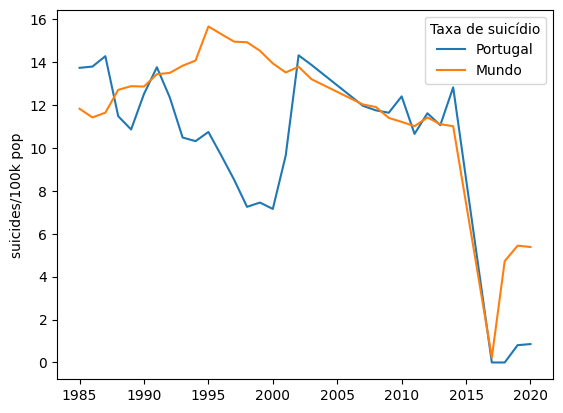

In [34]:
#media de suicidios entre Portugal e no Mundo
years = df_portugal.year.unique()    # pegar os anos para o eixo x
suicides_portugal_mean = df_portugal.groupby('year')['suicides/100k pop'].mean()

# Filtrar df para incluir apenas os anos presentes em df_portugal
suicides_world_mean = df[df['year'].isin(years)].groupby('year')['suicides/100k pop'].mean()

# plotar comparativo
ax = sns.lineplot(x=years, y=suicides_portugal_mean, label='Portugal')
ax = sns.lineplot(x=years, y=suicides_world_mean, label='Mundo')
plt.legend(title="Taxa de suicídio")
plt.show()

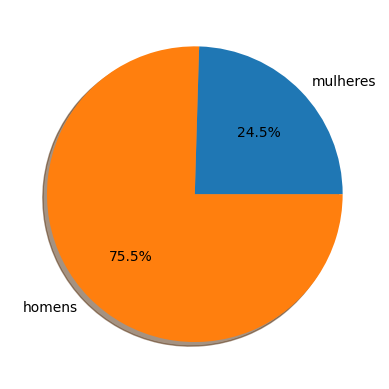

In [35]:
#valores entre homens e mulheres
homens_mulheres = df_portugal.groupby('sex').suicides_no.sum() / df_portugal.groupby('sex').suicides_no.sum().sum()

#gráfico de pizza
plt.pie(homens_mulheres, labels=['mulheres', 'homens'], autopct='%1.1f%%', shadow=True);

A análise mostra que a proporção de suicídios entre homens (75,5% dos suicídio) é significativamente maior do que entre mulheres (24,5% dos suicídios), com os homens a representar cerca de três vezes mais suicídios do que as mulheres.

In [36]:
#criar uma tabela dinâmica
table = pd.pivot_table(df_portugal, values='suicides_no', index=['year'], columns=['age'])

#ordem crescente
column_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
table = table.reindex(column_order, axis=1)
table.head()

age,5-14 years,15-24 years,25-34 years,35-54 years,55-74 years,75+ years
year,,,,,,
1985,5.0,61.0,59.0,131.0,171.5,64.0
1986,4.5,46.0,48.5,134.5,163.5,73.5
1987,2.5,52.0,61.5,129.5,152.0,82.5
1988,3.5,40.5,44.0,105.0,154.0,62.5
1989,2.0,38.0,47.0,77.0,142.0,67.5


In [37]:
rate_for_year_country = df[['suicides/100k pop', 'country']].groupby(['country']).sum().reset_index().sort_values(['suicides/100k pop'],ascending= False).head(10)

<Axes: xlabel='year', ylabel='suicides_no'>

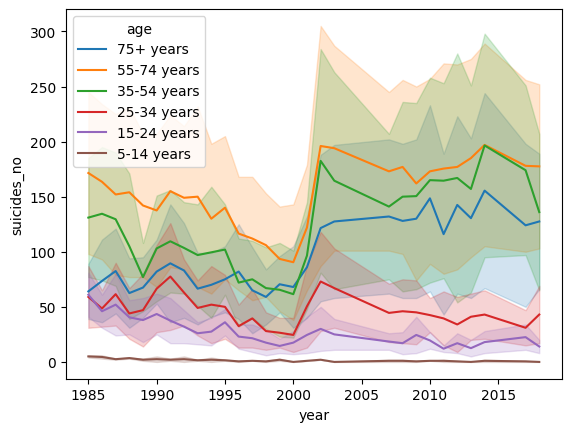

In [38]:
#Taxa de mortalidade em Portugal com base nas Categorias de Idade
sns.lineplot(data=df_portugal, x="year", y="suicides_no", hue="age")

O suicídio é um grave problema de saúde pública que afeta pessoas em todo o mundo, independentemente de idade, gênero ou localização geográfica. As taxas de suicídio variam amplamente entre os países, refletindo diferenças em fatores socioeconômicos, culturais e de saúde mental. Analisando dados globais, é possível observar padrões preocupantes, como a maior prevalência de suicídios entre homens em comparação com mulheres. No geral, os homens representam aproximadamente 76,5% dos casos de suicídio, enquanto as mulheres representam 23,5%.

Taxas de Suicídio - Visão Geral (1985-2021) O suicídio é uma preocupação significativa de saúde pública que afeta indivíduos, famílias e comunidades. Neste projeto, exploraremos as tendências e padrões das taxas de suicídio de 1985 a 2021. Através da nossa análise, obteremos uma melhor compreensão dos fatores que contribuem para o suicídio e das populações que estão mais em risco. Ao fornecer uma visão geral do estado atual das taxas de suicídio, este projeto visa aumentar a conscientização e apoiar os esforços para prevenir o suicídio.